# Task 1 - Data Preprocessing on Big Mart Sales Dataset

#### Import important libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [80]:
data = pd.read_csv('BigMartsales_data.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Data Cleaning
### check the informations related to data 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [35]:
data.shape

(8523, 12)

In [37]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [39]:
data.describe(include = "all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### Check for null values

In [41]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### check for duplicate values

In [43]:
data.duplicated().sum()

0

In [51]:
data['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [49]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [53]:
data.replace(['NaN', 'nan', 'NAN', 'NULL', 'null', '', 'None'], pd.NA, inplace=True)

In [55]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### "In the dataset, I found missing values in two columns — one numerical (Item_Weight) and one categorical (Outlet_Size).

For the numerical column, I filled missing values with the mean to preserve the overall distribution.

For the categorical column, I filled missing values with the mode (most frequent category) to maintain consistency.

In [68]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

C:\Users\hasti.LAPTOP-SLFI7KTT\AppData\Local\Temp\ipykernel_106896\1823082424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)


In [70]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

C:\Users\hasti.LAPTOP-SLFI7KTT\AppData\Local\Temp\ipykernel_106896\1434104270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)


In [72]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [82]:
import pandas as pd

# First, check missing values before filling
print("🔎 Missing values before filling:\n")
print(data.isnull().sum())

print("\n--- Filling missing values ---\n")

# Fill numerical column (example: Item_Weight) with mean
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

# Fill categorical column (example: Outlet_Size) with mode
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

# Now check missing values after filling
print("✅ Missing values after filling:\n")
print(data.isnull().sum())


🔎 Missing values before filling:

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

--- Filling missing values ---

✅ Missing values after filling:

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


C:\Users\hasti.LAPTOP-SLFI7KTT\AppData\Local\Temp\ipykernel_106896\1466333888.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
C:\Users\hasti.LAPTOP-SLFI7KTT\AppData\Local\Temp\ipykernel_106896\1466333888.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

### Outliers Detection

In [86]:
# categoy and num
cat = []
num = []
for i in data.columns:
    if data[i].dtype == 'O':
        cat.append(i)
    else:
        num.append(i)

In [90]:
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [92]:
num

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

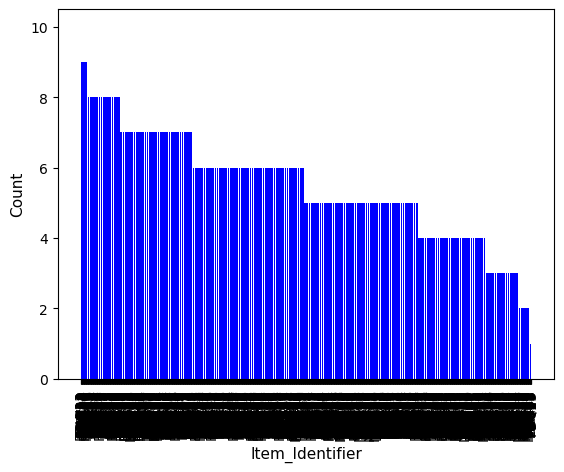

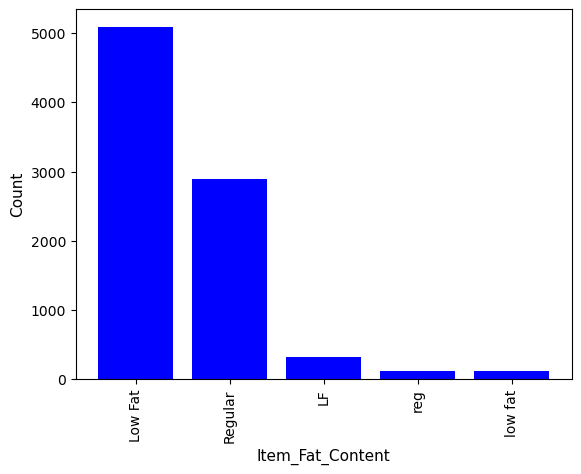

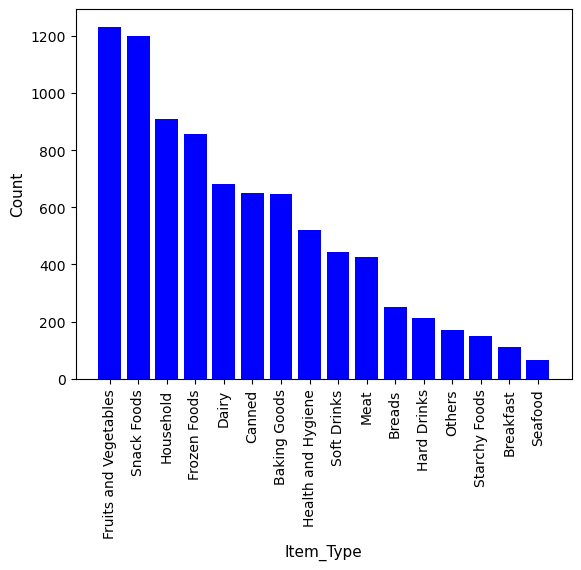

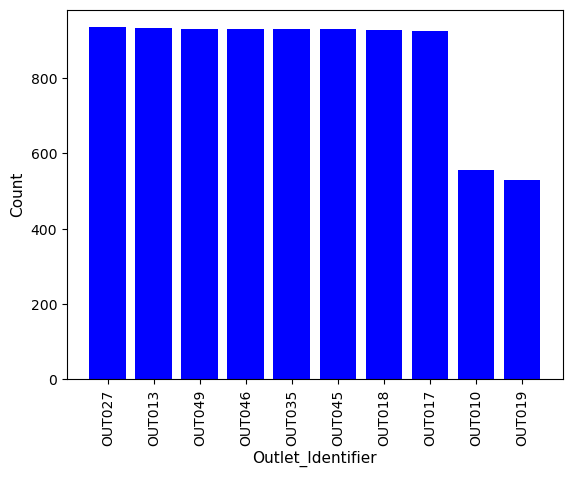

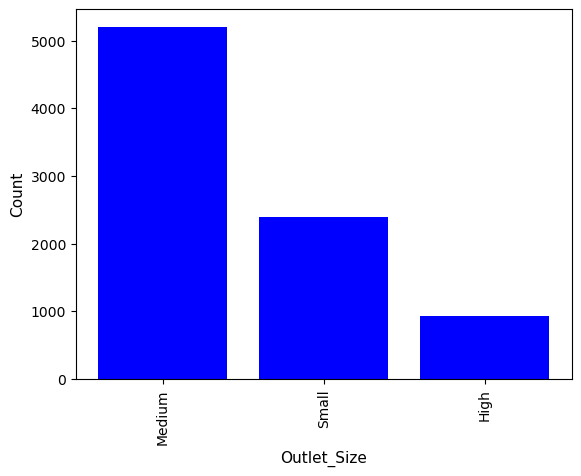

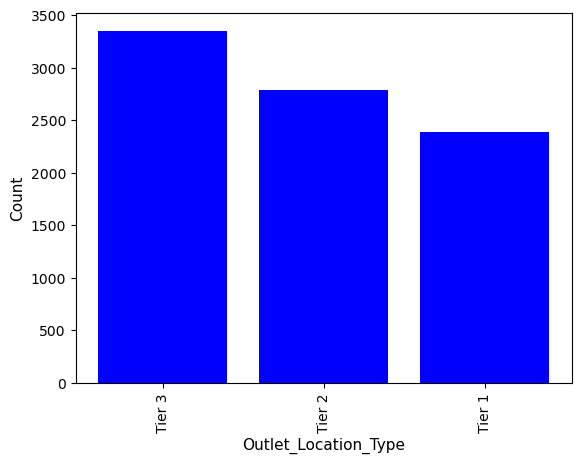

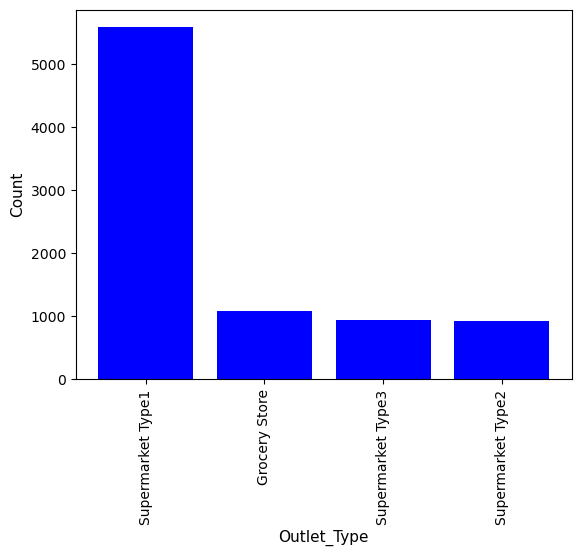

In [106]:
for i in cat:
    vc = data[i].value_counts()
    plt.bar(vc.index, height=vc, color='b')
    plt.xlabel(i, fontsize=11)
    plt.xticks(rotation=90)
    plt.ylabel('Count', fontsize=11)
    plt.show()

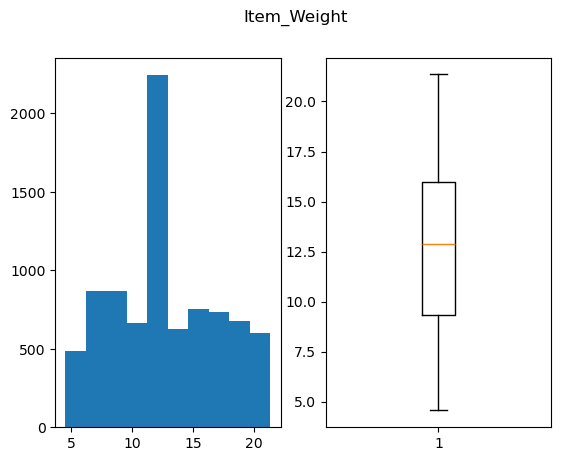

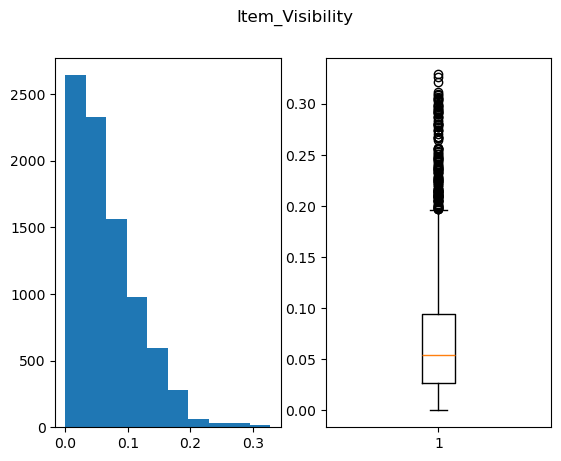

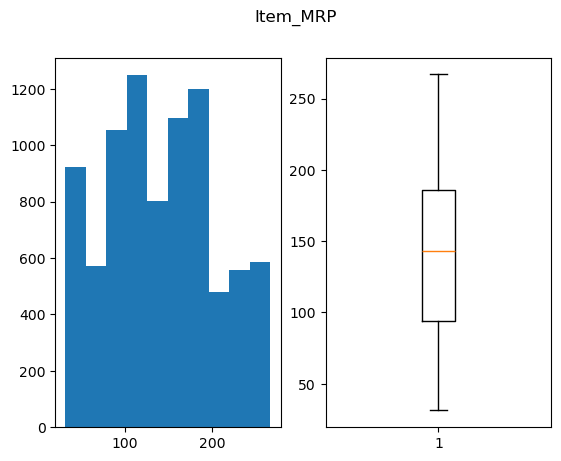

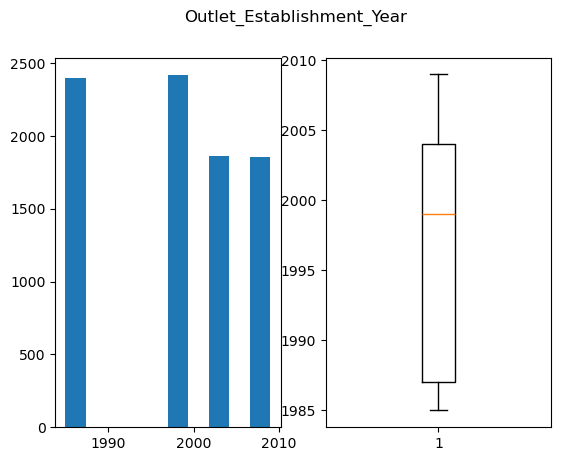

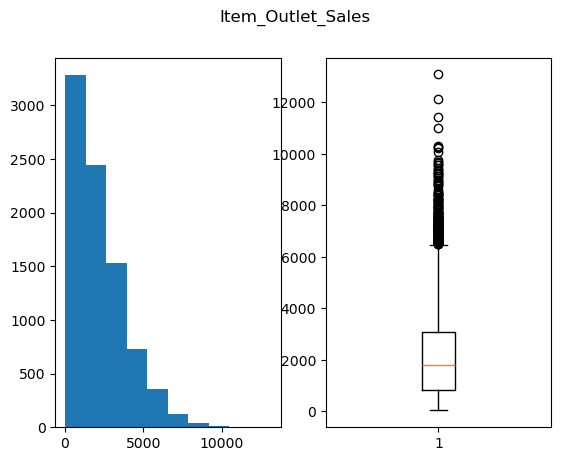

In [108]:
for i in num:
    fig, ax=plt.subplots(1,2) #1 row, 2 column
    ax[0].hist(data[i])
    ax[1].boxplot(data[i])
    # plt.title(i) -- title for boxplot only
    plt.suptitle(i)
    plt.show()

In [ ]:
Item_Visibility
Item_Outlet_Sales

In [110]:
# replace outliers using IQR Winsorization
# replace lower outliers with lower fence
# replace upper outliers with upper fence

for i in num:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    lf = q1-1.5*iqr
    uf = q3+1.5*iqr
    data.loc[data[i]<lf, i]=lf
    data.loc[data[i]>uf, i]=uf

C:\Users\hasti.LAPTOP-SLFI7KTT\AppData\Local\Temp\ipykernel_106896\1492520854.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1961.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[i]<lf, i]=lf


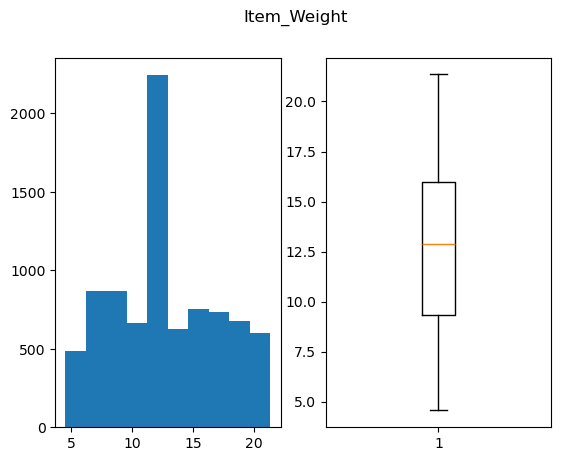

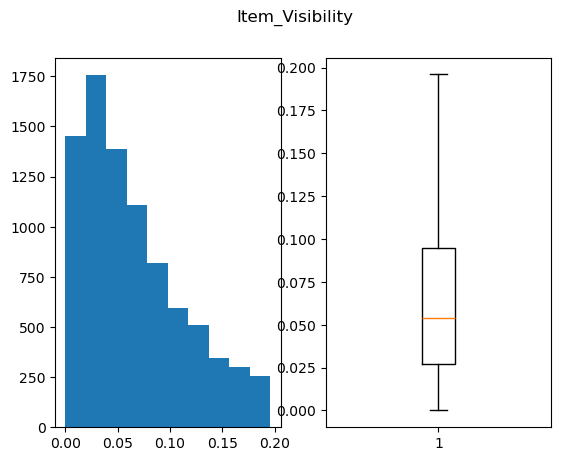

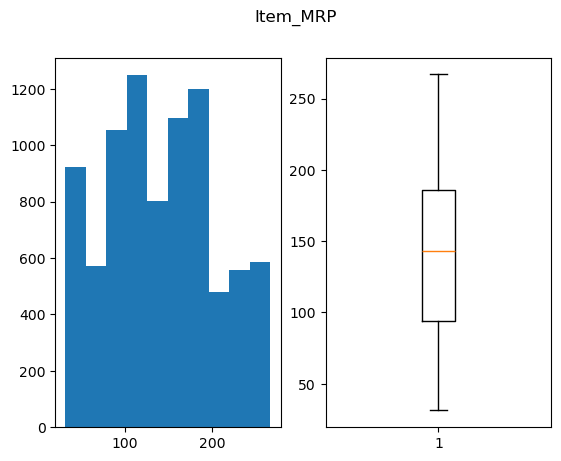

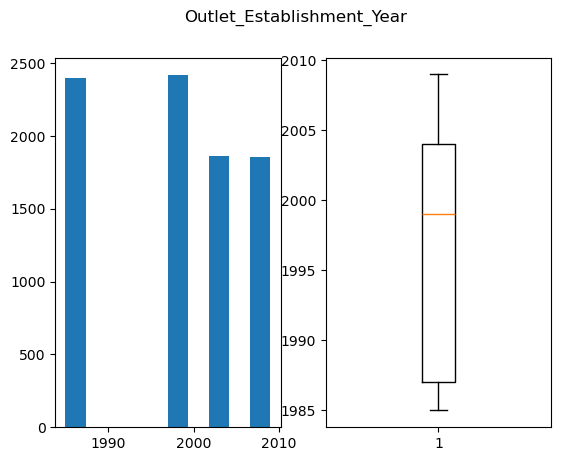

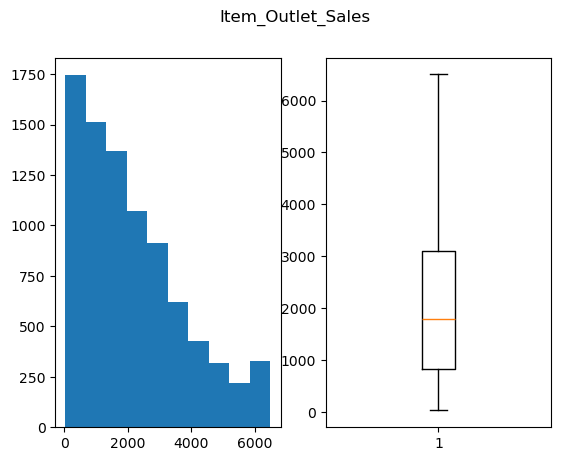

In [112]:
for i in num:
    fig, ax=plt.subplots(1,2) #1 row, 2 column
    ax[0].hist(data[i])
    ax[1].boxplot(data[i])
    # plt.title(i) -- title for boxplot only
    plt.suptitle(i)
    plt.show()

In [120]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [122]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228


<!-- In this notebook, missing values in the Big Mart Sales Dataset were handled by imputing the mode for categorical columns and the mean for numerical columns. Outliers in the Item_Visibility and Item_Outlet_Sales columns were detected and removed using the Interquartile Range (IQR) method. These preprocessing steps ensure that the dataset is clean and ready for further analysis or machine learning modeling. -->

#### In this notebook, missing values in the Big Mart Sales Dataset were handled by imputing the mode for categorical columns and the mean for numerical columns. Outliers in the Item_Visibility and Item_Outlet_Sales columns were detected and removed using the Interquartile Range (IQR) method. These preprocessing steps ensure that the dataset is clean and ready for further analysis or machine learning modeling.

